In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'}
from IPython.display import clear_output # clear_output() 으로 아웃풋 제거 가능

#  텐서플로우 튜토리얼 - 딥러닝 도구들1
- 튜토리얼을 제공하는 깃헙https://github.com/golbin/TensorFlow-Tutorials
- 모두를 위한 딥러닝 강의 https://www.youtube.com/watch?v=BS6O0zOGX4E&list=PLlMkM4tgfjnLSOjrEJN31gZATbcj_MpUm

- 현재 나와있는 이미지 분석 기법들 정리한 블로그
    - https://ratsgo.github.io/deep%20learning/2017/10/09/CNNs/


## 목차
- MNIST (손글씨 숫자 인식)
- CNN (이미지처리)
    - layers 패키지로 재구성 및 코드비교
- Autoencoder (비지도학습)
- GAN (비지도 학습 + 생성모델)

## MNIST
- 머신러닝 학습의 Hello World 와 같은 MNIST(손글씨 숫자 인식) 문제를 신경망으로 풀어봅니다.
- 과적합 방지 기법 중 하나인 Dropout 을 사용해봅니다.

신경망 모델 구성중...
학습 시작!
Epoch: 0003 Avg. cost = 0.112
Epoch: 0006 Avg. cost = 0.059
Epoch: 0009 Avg. cost = 0.041
Epoch: 0012 Avg. cost = 0.032
Epoch: 0015 Avg. cost = 0.025
Epoch: 0018 Avg. cost = 0.020
Epoch: 0021 Avg. cost = 0.022
Epoch: 0024 Avg. cost = 0.015
Epoch: 0027 Avg. cost = 0.016
Epoch: 0030 Avg. cost = 0.015

최적화 완료!
정확도: 0.9829


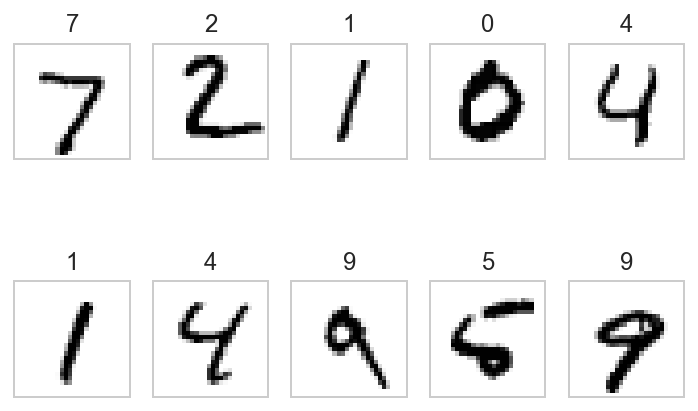

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
# 텐서플로우에 기본 내장된 mnist 모듈을 이용하여 데이터를 로드합니다.
# 지정한 폴더에 MNIST 데이터가 없는 경우 자동으로 데이터를 다운로드합니다.
# one_hot 옵션은 레이블을 동물 분류 예제에서 보았던 one_hot 방식의 데이터로 만들어줍니다.
print("mnist예제 받는중" ,end='\r')
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)
clear_output()
print("신경망 모델 구성중...")
#########=====================
# 신경망 모델 구성
######

# 입력 값의 차원은 [배치크기, 특성값] 으로 되어 있습니다.
# 손글씨 이미지는 28x28 픽셀로 이루어져 있고, 이를 784개의 특성값으로 정합니다.
X = tf.placeholder(tf.float32, [None, 784])
# 결과값은 0~9까지 값을 가짐
Y = tf.placeholder(tf.float32, [None,10])

keep_prob = tf.placeholder(tf.float32) # dropout에 사용

# 신경망의 레이어는 다음처럼 구성합니다.
# 784(입력 특성값)
#   -> 256 (히든레이어 뉴런 갯수) -> 256 (히든레이어 뉴런 갯수)
#   -> 10 (결과값 0~9 분류)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
# 입력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L1 = tf.nn.relu(tf.matmul(X, W1))
# 텐서플로우에 내장된 함수를 이용하여 dropout 을 적용합니다.
# 함수에 적용할 레이어와 확률만 넣어주면 됩니다. 겁나 매직!!
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
# L1 레이어의 출력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듭니다.
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
# 최종 모델의 출력값은 W3 변수를 곱해 10개의 분류를 가지게 됩니다.
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)


print("학습 시작!")

#########======================
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0

    for i in range(total_batch):
        # 텐서플로우의 mnist 모델의 next_batch 함수를 이용해
        # 지정한 크기만큼 학습할 데이터를 가져옵니다.
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys,
                                                            keep_prob:0.8})
        total_cost += cost_val
        
    if (epoch+1) % 3 == 0:
        print('Epoch:', '%04d' % (epoch + 1),
              'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
    else : 
        print('Epoch:', '%04d' % (epoch + 1),
              'Avg. cost =', '{:.3f}'.format(total_cost / total_batch), end='\r')

print('\n최적화 완료!')

#########===========================
# 결과 확인
######
# model 로 예측한 값과 실제 레이블인 Y의 값을 비교합니다.
# tf.argmax 함수를 이용해 예측한 값에서 가장 큰 값을 예측한 레이블이라고 평가합니다.
# 예) [0.1 0 0 0.7 0 0.2 0 0 0 0] -> 3
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels,
                                  keep_prob:1}))



#########
# 결과 확인 (matplot)
######
labels = sess.run(model,
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels,
                             keep_prob: 1})

fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)),
                   cmap=plt.cm.gray_r)

plt.show()

## CNN
- 이미지 처리 분야에서 가장 유명한 신경망 모델인 CNN 을 이용하여 더 높은 인식률을 만들어봅니다.

In [8]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

print("mnist예제 받는중" ,end='\r')
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)
clear_output()
print("신경망 모델 구성중...", end="\r")

#########===============================
# 신경망 모델 구성
######

# 기존 모델에서는 입력 값을 28x28 하나의 차원으로 구성하였으나,
# CNN 모델을 사용하기 위해 2차원 평면과 특성치의 형태를 갖는 구조로 만듭니다.
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

# 각각의 변수와 레이어는 다음과 같은 형태로 구성됩니다.
# W1 [3 3 1 32] -> [3 3]: 커널 크기, 1: 입력값 X 의 특성수, 32: 필터 갯수
# L1 Conv shape=(?, 28, 28, 32)
#    Pool     ->(?, 14, 14, 32)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
# tf.nn.conv2d 를 이용해 한칸씩 움직이는 컨볼루션 레이어를 쉽게 만들 수 있습니다.
# padding='SAME' 은 커널 슬라이딩시 최외곽에서 한칸 밖으로 더 움직이는 옵션
L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
# Pooling 역시 tf.nn.max_pool 을 이용하여 쉽게 구성할 수 있습니다.
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# L1 = tf.nn.dropout(L1, keep_prob)

# L2 Conv shape=(?, 14, 14, 64)
#    Pool     ->(?, 7, 7, 64)
# W2 의 [3, 3, 32, 64] 에서 32 는 L1 에서 출력된 W1 의 마지막 차원, 필터의 크기 입니다.
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# L2 = tf.nn.dropout(L2, keep_prob)

# FC 레이어: 입력값 7x7x64 -> 출력값 256
# Full connect를 위해 직전의 Pool 사이즈인 (?, 7, 7, 64) 를 참고하여 차원을 줄여줍니다.
#    Reshape  ->(?, 256)
W3 = tf.Variable(tf.random_normal([7 * 7 * 64, 256], stddev=0.01))
L3 = tf.reshape(L2, [-1, 7 * 7 * 64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)

# 최종 출력값 L3 에서의 출력 256개를 입력값으로 받아서 0~9 레이블인 10개의 출력값을 만듭니다.
W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L3, W4)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
# 최적화 함수를 RMSPropOptimizer 로 바꿔서 결과를 확인해봅시다.
# optimizer = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
print("학습시작!")

#########================================
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # 이미지 데이터를 CNN 모델을 위한 자료형태인 [28 28 1] 의 형태로 재구성합니다.
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.7})
        total_cost += cost_val

    if (epoch+1) % 3 == 0:
        print('Epoch:', '%04d' % (epoch + 1),
              'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
    else : 
        print('Epoch:', '%04d' % (epoch + 1),
              'Avg. cost =', '{:.3f}'.format(total_cost / total_batch), end='\r')

print('\n최적화 완료!')


학습시작!델 구성중...
Epoch: 0003 Avg. cost = 0.080
Epoch: 0006 Avg. cost = 0.044
Epoch: 0009 Avg. cost = 0.031
Epoch: 0012 Avg. cost = 0.023
Epoch: 0015 Avg. cost = 0.016

최적화 완료!


#### tensorflow.layers를 사용하여 더 쉽고 보기좋게 만들어보자
- 신경망 구성을 손쉽게 해 주는 유틸리티 모음인 tensorflow.layers 를 사용해봅니다.
- 위의 코드를 재구성한 것이니, 소스를 한 번 비교해보세요.
- 이처럼 TensorFlow 에는 간단하게 사용할 수 있는 다양한 함수와 유틸리티들이 매우 많이 마련되어 있습니다.


In [ ]:

import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
is_training = tf.placeholder(tf.bool)

# 기본적으로 inputs, outputs size, kernel_size 만 넣어주면
# 활성화 함수 적용은 물론, 컨볼루션 신경망을 만들기 위한 나머지 수치들은 알아서 계산해줍니다.
# 특히 Weights 를 계산하는데 xavier_initializer 를 쓰고 있는 등,
# 크게 신경쓰지 않아도 일반적으로 효율적인 신경망을 만들어줍니다.
L1 = tf.layers.conv2d(X, 32, [3, 3], activation=tf.nn.relu)
L1 = tf.layers.max_pooling2d(L1, [2, 2], [2, 2])
L1 = tf.layers.dropout(L1, 0.7, is_training)

L2 = tf.layers.conv2d(L1, 64, [3, 3], activation=tf.nn.relu)
L2 = tf.layers.max_pooling2d(L2, [2, 2], [2, 2])
L2 = tf.layers.dropout(L2, 0.7, is_training)

L3 = tf.contrib.layers.flatten(L2)
L3 = tf.layers.dense(L3, 256, activation=tf.nn.relu)
L3 = tf.layers.dropout(L3, 0.5, is_training)

model = tf.layers.dense(L3, 10, activation=None)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          is_training: True})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images.reshape(-1, 28, 28, 1),
                                   Y: mnist.test.labels,
                                   is_training: False}))

## Autoencoder - 비지도학습
- 대표적인 비지도(Unsupervised) 학습 방법인 Autoencoder 를 구현해봅니다.

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.2004
Epoch: 0002 Avg. cost = 0.0626
Epoch: 0003 Avg. cost = 0.0520
Epoch: 0004 Avg. cost = 0.0456
Epoch: 0005 Avg. cost = 0.0417
Epoch: 0006 Avg. cost = 0.0395
Epoch: 0007 Avg. cost = 0.0372
Epoch: 0008 Avg. cost = 0.0352
Epoch: 0009 Avg. cost = 0.0343
Epoch: 0010 Avg. cost = 0.0337
Epoch: 0011 Avg. cost = 0.0334
Epoch: 0012 Avg. cost = 0.0331
Epoch: 0013 Avg. cost = 0.0327
Epoch: 0014 Avg. cost = 0.0326
Epoch: 0015 Avg. cost = 0.0324
Epoch: 0016 Avg. cost = 0.0323
Epoch: 0017 Avg. cost = 0.0322
Epoch: 0018 Avg. cost = 0.0320
Epoch: 0019 Avg. cost = 0.0316
Epoch: 0020 Avg. cost = 0.0310
최적화 완료!


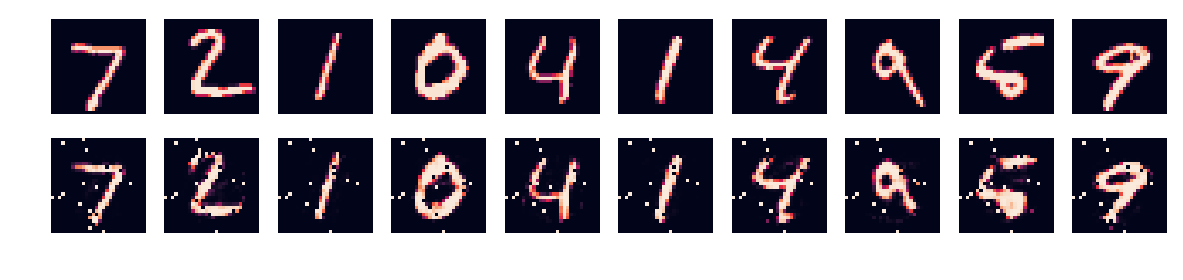

In [3]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 옵션 설정
######
learning_rate = 0.01
training_epoch = 20
batch_size = 100
# 신경망 레이어 구성 옵션
n_hidden = 256  # 히든 레이어의 뉴런 갯수
n_input = 28*28   # 입력값 크기 - 이미지 픽셀수

#########
# 신경망 모델 구성
######
# Y 가 없습니다. 입력값을 Y로 사용하기 때문입니다.
X = tf.placeholder(tf.float32, [None, n_input])

# 인코더 레이어와 디코더 레이어의 가중치와 편향 변수를 설정합니다.
# 다음과 같이 이어지는 레이어를 구성하기 위한 값들 입니다.
# input -> encode -> decode -> output
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
# sigmoid 함수를 이용해 신경망 레이어를 구성합니다.
# sigmoid(X * W + b)
# 인코더 레이어 구성
encoder = tf.nn.sigmoid(
                tf.add(tf.matmul(X, W_encode), b_encode))

# encode 의 아웃풋 크기를 입력값보다 작은 크기로 만들어 정보를 압축하여 특성을 뽑아내고,
# decode 의 출력을 입력값과 동일한 크기를 갖도록하여 입력과 똑같은 아웃풋을 만들어 내도록 합니다.
# 히든 레이어의 구성과 특성치을 뽑아내는 알고리즘을 변경하여 다양한 오토인코더를 만들 수 있습니다.
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
# 디코더 레이어 구성
# 이 디코더가 최종 모델이 됩니다.
decoder = tf.nn.sigmoid(
                tf.add(tf.matmul(encoder, W_decode), b_decode))

# 디코더는 인풋과 최대한 같은 결과를 내야 하므로, 디코딩한 결과를 평가하기 위해
# 입력 값인 X 값을 평가를 위한 실측 결과 값으로하여 decoder 와의 차이를 손실값으로 설정합니다.
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
# 입력값(위쪽)과 모델이 생성한 값(아래쪽)을 시각적으로 비교해봅니다.
######
sample_size = 10

samples = sess.run(decoder,
                   feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()

## GAN
- 2016년에 가장 관심을 많이 받았던 비감독(Unsupervised) 학습 방법인
- Generative Adversarial Network(GAN)을 구현해봅니다.
- https://arxiv.org/abs/1406.2661

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print("트레이닝 셋 로드중...")
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)
clear_output()
print("트레이닝 셋 로드 완료!")
#########
# 옵션 설정
######
total_epoch = 200
batch_size = 100
learning_rate = 0.0002
# 신경망 레이어 구성 옵션
n_hidden = 256
n_input = 28 * 28
n_noise = 128 #생성기의 입력값으로 사용할 노이즈의 크기
print("모델구성중...",end="\r")
#########
# 신경망 모델 구성
######
# GAN도 Unsupervised 학습이므로 Autoencoder 처럼 Y를 사용하지 않는다.
X = tf.placeholder(tf.float32,[None, n_input])
# 노이즈 Z를 입력값으로 사용
Z = tf.placeholder(tf.float32,[None, n_noise])

# 생성기 신경망에 사용하는 변수들
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01))
G_b1 = tf.Variable(tf.zeros([n_hidden]))
G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))

# 판별기 신경망에 사용하는 변수들
D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))
# 판별기의 최종 결과값은 얼마나 진짜와 가깝냐를 판단하는 한 개의 스칼라값임
D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01))
D_b2 = tf.Variable(tf.zeros([1]))


###
# 신경망 구성

print("신경망 구성중...",end="\r")

# 생성기(G) 신경망을 구성합니다.
def generator(noise_z):
    hidden = tf.nn.relu(tf.matmul(noise_z, G_W1) + G_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden,G_W2) + G_b2)
    return output

# 판별기(D) 신경망을 구성합니다.
def discriminator(inputs):
    hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_b2)
    return output

# 랜덤한 노이즈(Z)를 만듭니다.
def get_noise(batch_size, n_noise):
    return np.random.normal(size=(batch_size, n_noise))

# 노이즈를 이용해 랜덤한 이미지를 생성합니다.
G = generator(Z)
# 노이즈를 이용해 생성한 이미지가 진자 이미지인지 구합니다.
D_gene = discriminator(G)
# 진짜 이미지를 이용해 판별한 값을 구합니다.
D_real = discriminator(X)

# 논문에 따르면, GAN 모델의 최적화는 loss_G 와 loss_D 를 최대화 하는 것 입니다.
# 다만 loss_D와 loss_G는 서로 연관관계가 있기 때문에 두 개의 손실값이 항상 같이 증가하는 경향을 보이지는 않을 것 입니다.
# loss_D가 증가하려면 loss_G는 하락해야하고, loss_G가 증가하려면 loss_D는 하락해야하는 경쟁관계에 있기 때문입니다.
# 논문의 수식에 따른 다음 로직을 보면 loss_D 를 최대화하기 위해서는 D_gene 값을 최소화하게 됩니다.
# 판별기에 진짜 이미지를 넣었을 때에도 최대값을 : tf.log(D_real)
# 가짜 이미지를 넣었을 때에도 최대값을 : tf.log(1 - D_gene)
# 갖도록 학습시키기 때문입니다.
# 이것은 판별기는 생성기가 만들어낸 이미지가 가짜라고 판단하도록 판별기 신경망을 학습시킵니다.
loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1-D_gene))
# 반면 loss_G 를 최대화하기 위해서는 D_gene 값을 최대화하게 되는데,
# 이것은 가짜 이미지를 넣었을 때, 판별기가 최대한 실제 이미지라고 판단하도록 생성기 신경망을 학습시킵니다.
# 논문에서는 loss_D 와 같은 수식으로 최소화 하는 생성기를 찾지만,
# 결국 D_gene 값을 최대화하는 것이므로 다음과 같이 사용할 수 있습니다.
loss_G = tf.reduce_mean(tf.log(D_gene))

# loss_D 를 구할때는 판별기 신경망에 사용되는 변수만 사용하고,
# loss_G 를 구할때는 생성기 신경망에 사용되는 변수만 사용하여 최적화한다
D_var_list = [D_W1, D_b1, D_W2, D_b2]
G_var_list = [G_W1, G_b1, G_W2, G_b2]

# GAN 논문의 수식에 따르면 loss 를 극대화 해야하지만, minimize 하는 최적화 함수를 사용하기 때문에
# 최적화 하려는 loss_D 와 loss_G 에 음수 부호를 붙여줍니다.
train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D, var_list=D_var_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G, var_list=G_var_list)


print("신경망 모델 학습중...")
#########
# 신경망 모델 학습
######
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
    print('running epoch ',epoch,'...',end="\r")
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)
        
        # 판별기와 생성기 신경망을 각각 학습시킨다.
        _, loss_val_D = sess.run([train_D, loss_D], feed_dict = {X:batch_xs, Z:noise})
        _, loss_val_G = sess.run([train_G, loss_G], feed_dict = {Z:noise})

    print('Epoch:', '%04d' % epoch, 'D loss{:.4}'.format(loss_val_D), 'G loss{:4}'.format(loss_val_G))
    
    #########
    # 학습이 되어가는 모습을 보기 위해 주기적으로 이미지를 생성하여 저장
    ######
    
    if epoch ==0 or (epoch + 1) % 5 == 0:
        print("generate sample image...",end="")
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Z:noise})
        
        fig, ax = plt.subplots(1,sample_size, figsize=(sample_size,1))
        
        for i in range(sample_size):
            ax[i].set_axis_off()
            ax[i].imshow(np.reshape(samples[i], (28,28)))
            
        plt.savefig('samples/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
        plt.close(fig)
        print("OK!")
        
print('최적화 완료!')
        
        

- GAN 모델을 이용해 단순히 랜덤한 숫자를 생성하는 아닌,
- 원하는 손글씨 숫자를 생성하는 모델을 만들어봅니다.
- 이런 방식으로 흑백 사진을 컬러로 만든다든가, 또는 선화를 채색한다든가 하는 응용이 가능합니다.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)
clear_output()
print("신경망 구성중...",end="\r")
#########
# 옵션 설정
######
total_epoch = 200
batch_size = 100
n_hidden = 256
n_input = 28 * 28
n_noise = 128
n_class = 10

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, n_input])
# 노이즈와 실제 이미지에, 그에 해당하는 숫자에 대한 정보를 넣어주기 위해 사용합니다.
Y = tf.placeholder(tf.float32, [None, n_class])
Z = tf.placeholder(tf.float32, [None, n_noise])

def generator(noise, labels):
    with tf.variable_scope('generator'):
        # noise 값에 labels 정보를 추가합니다.
        inputs = tf.concat([noise, labels], 1)

        # TensorFlow 에서 제공하는 유틸리티 함수를 이용해 신경망을 매우 간단하게 구성할 수 있습니다.
        hidden = tf.layers.dense(inputs, n_hidden,
                                 activation=tf.nn.relu)
        output = tf.layers.dense(hidden, n_input,
                                 activation=tf.nn.sigmoid)

    return output


def discriminator(inputs, labels, reuse=None):
    with tf.variable_scope('discriminator') as scope:
        # 노이즈에서 생성한 이미지와 실제 이미지를 판별하는 모델의 변수를 동일하게 하기 위해,
        # 이전에 사용되었던 변수를 재사용하도록 합니다.
        if reuse:
            scope.reuse_variables()

        inputs = tf.concat([inputs, labels], 1)

        hidden = tf.layers.dense(inputs, n_hidden,
                                 activation=tf.nn.relu)
        output = tf.layers.dense(hidden, 1,
                                 activation=None)

    return output


def get_noise(batch_size, n_noise):
    return np.random.uniform(-1., 1., size=[batch_size, n_noise])

# 생성 모델과 판별 모델에 Y 즉, labels 정보를 추가하여
# labels 정보에 해당하는 이미지를 생성할 수 있도록 유도합니다.
G = generator(Z, Y)
D_real = discriminator(X, Y)
D_gene = discriminator(G, Y, True)

# 손실함수는 다음을 참고하여 GAN 논문에 나온 방식과는 약간 다르게 작성하였습니다.
# http://bamos.github.io/2016/08/09/deep-completion/
# 진짜 이미지를 판별하는 D_real 값은 1에 가깝도록,
# 가짜 이미지를 판별하는 D_gene 값은 0에 가깝도록 하는 손실 함수입니다.
loss_D_real = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(
                        logits=D_real, labels=tf.ones_like(D_real)))
loss_D_gene = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(
                        logits=D_gene, labels=tf.zeros_like(D_gene)))
# loss_D_real 과 loss_D_gene 을 더한 뒤 이 값을 최소화 하도록 최적화합니다.
loss_D = loss_D_real + loss_D_gene
# 가짜 이미지를 진짜에 가깝게 만들도록 생성망을 학습시키기 위해, D_gene 을 최대한 1에 가깝도록 만드는 손실함수입니다.
loss_G = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(
                        logits=D_gene, labels=tf.ones_like(D_gene)))

# TensorFlow 에서 제공하는 유틸리티 함수를 이용해
# discriminator 와 generator scope 에서 사용된 변수들을 쉽게 가져올 수 있습니다.
vars_D = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                           scope='discriminator')
vars_G = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                           scope='generator')

train_D = tf.train.AdamOptimizer().minimize(loss_D,
                                            var_list=vars_D)
train_G = tf.train.AdamOptimizer().minimize(loss_G,
                                            var_list=vars_G)
print("신경망 모델 학습중...")
#########
# 신경망 모델 학습
######
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
    print('running epoch ',epoch,'...',end="\r")
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)

        _, loss_val_D = sess.run([train_D, loss_D],
                                 feed_dict={X: batch_xs, Y: batch_ys, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G],
                                 feed_dict={Y: batch_ys, Z: noise})

    print('Epoch:', '%04d' % epoch,
          'D loss: {:.4}'.format(loss_val_D),
          'G loss: {:.4}'.format(loss_val_G))

    #########
    # 학습이 되어가는 모습을 보기 위해 주기적으로 레이블에 따른 이미지를 생성하여 저장
    ######
    if epoch == 0 or (epoch + 1) % 5 == 0:
        print("generate sample image...",end="")
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G,
                           feed_dict={Y: mnist.test.labels[:sample_size],
                                      Z: noise})

        fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

        for i in range(sample_size):
            ax[0][i].set_axis_off()
            ax[1][i].set_axis_off()

            ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
            ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

        plt.savefig('samples2/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
        plt.close(fig)
        print("OK!")

print('최적화 완료!')

신경망 모델 학습중...
Epoch: 0000 D loss: 0.007561 G loss: 7.766
generate sample image...OK!
Epoch: 0001 D loss: 0.006955 G loss: 8.354
Epoch: 0002 D loss: 0.002728 G loss: 9.488
Epoch: 0003 D loss: 0.0005423 G loss: 9.444
Epoch: 0004 D loss: 0.0005298 G loss: 9.315
generate sample image...OK!
Epoch: 0005 D loss: 0.0002369 G loss: 10.13
Epoch: 0006 D loss: 4.167e-05 G loss: 11.78
Epoch: 0007 D loss: 0.0003545 G loss: 11.05
Epoch: 0008 D loss: 7.399e-05 G loss: 11.32
Epoch: 0009 D loss: 3.225e-06 G loss: 14.38
generate sample image...OK!
Epoch: 0010 D loss: 0.0001301 G loss: 12.14
Epoch: 0011 D loss: 0.000324 G loss: 12.46
Epoch: 0012 D loss: 2.352e-05 G loss: 16.16
Epoch: 0013 D loss: 3.667e-06 G loss: 16.7
Epoch: 0014 D loss: 4.792e-07 G loss: 15.43
generate sample image...OK!
Epoch: 0015 D loss: 1.072e-07 G loss: 16.51
Epoch: 0016 D loss: 3.421e-08 G loss: 17.46
Epoch: 0017 D loss: 4.047e-08 G loss: 18.36
Epoch: 0018 D loss: 2.142e-08 G loss: 17.97
Epoch: 0019 D loss: 9.392e-09 G loss: 18.91

Epoch: 0165 D loss: 1.165e-11 G loss: 30.38
Epoch: 0166 D loss: 9.049e-12 G loss: 30.46
Epoch: 0167 D loss: 5.179e-11 G loss: 28.1
Epoch: 0168 D loss: 4.321e-10 G loss: 25.99
Epoch: 0169 D loss: 4.863e-11 G loss: 28.05
generate sample image...OK!
Epoch: 0170 D loss: 4.178e-09 G loss: 22.95
Epoch: 0171 D loss: 8.648e-09 G loss: 23.88
Epoch: 0172 D loss: 9.265e-10 G loss: 25.87
Epoch: 0173 D loss: 1.107e-07 G loss: 19.96
Epoch: 0174 D loss: 6.024e-29 G loss: 160.5
generate sample image...OK!
Epoch: 0175 D loss: 1.801e-19 G loss: 81.14
Epoch: 0176 D loss: 4.865e-20 G loss: 61.31
Epoch: 0177 D loss: 1.629e-16 G loss: 59.25
Epoch: 0178 D loss: 1.232e-20 G loss: 49.2
Epoch: 0179 D loss: 1.49e-14 G loss: 49.2
generate sample image...OK!
Epoch: 0180 D loss: 2.903e-17 G loss: 41.25
Epoch: 0181 D loss: 1.512e-12 G loss: 29.7
Epoch: 0182 D loss: 3.727e-09 G loss: 23.91
Epoch: 0183 D loss: 5.022e-11 G loss: 25.03
Epoch: 0184 D loss: 5.945e-10 G loss: 23.27
generate sample image...OK!
Epoch: 0185 D

## RNN
- 머신러닝 학습의 Hello World 와 같은 MNIST(손글씨 숫자 인식) 문제를 신경망으로 풀어봅니다.
- MNIST

In [3]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 옵션 설정
######
learning_rate = 0.001
total_epoch = 30
batch_size = 128

# RNN 은 순서가 있는 자료를 다루므로,
# 한 번에 입력받는 갯수와, 총 몇 단계로 이루어져있는 데이터를 받을지를 설정해야합니다.
# 이를 위해 가로 픽셀수를 n_input 으로, 세로 픽셀수를 입력 단계인 n_step 으로 설정하였습니다.
n_input = 28
n_step = 28
n_hidden = 128
n_class = 10

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, n_step, n_input])
Y = tf.placeholder(tf.float32, [None, n_class])

W = tf.Variable(tf.random_normal([n_hidden, n_class]))
b = tf.Variable(tf.random_normal([n_class]))

# RNN 에 학습에 사용할 셀을 생성합니다
# 다음 함수들을 사용하면 다른 구조의 셀로 간단하게 변경할 수 있습니다
# BasicRNNCell,BasicLSTMCell,GRUCell
cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)

# RNN 신경망을 생성합니다
# 원래는 다음과 같은 과정을 거쳐야 하지만
# states = tf.zeros(batch_size)
# for i in range(n_step):
#     outputs, states = cell(X[[:, i]], states)
# ...
# 다음처럼 tf.nn.dynamic_rnn 함수를 사용하면
# CNN 의 tf.nn.conv2d 함수처럼 간단하게 RNN 신경망을 만들어줍니다.
# 겁나 매직!!
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# 결과를 Y의 다음 형식과 바꿔야 하기 때문에
# Y : [batch_size, n_class]
# outputs 의 형태를 이에 맞춰 변경해야합니다.
# outputs : [batch_size, n_step, n_hidden]
#        -> [n_step, batch_size, n_hidden]
#        -> [batch_size, n_hidden]
outputs = tf.transpose(outputs, [1, 0, 2])
outputs = outputs[-1]
model = tf.matmul(outputs, W) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

#########
# 신경망 모델 학습
######
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(total_epoch):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # X 데이터를 RNN 입력 데이터에 맞게 [batch_size, n_step, n_input] 형태로 변환합니다.
        batch_xs = batch_xs.reshape((batch_size, n_step, n_input))

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

test_batch_size = len(mnist.test.images)
test_xs = mnist.test.images.reshape(test_batch_size, n_step, n_input)
test_ys = mnist.test.labels

print('정확도:', sess.run(accuracy,
                       feed_dict={X: test_xs, Y: test_ys}))

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.572
Epoch: 0002 Avg. cost = 0.242
Epoch: 0003 Avg. cost = 0.179
Epoch: 0004 Avg. cost = 0.162
Epoch: 0005 Avg. cost = 0.136
Epoch: 0006 Avg. cost = 0.138
Epoch: 0007 Avg. cost = 0.118
Epoch: 0008 Avg. cost = 0.109
Epoch: 0009 Avg. cost = 0.101
Epoch: 0010 Avg. cost = 0.100
Epoch: 0011 Avg. cost = 0.098
Epoch: 0012 Avg. cost = 0.100
Epoch: 0013 Avg. cost = 0.088
Epoch: 0014 Avg. cost = 0.083
Epoch: 0015 Avg. cost = 0.082
Epoch: 0016 Avg. cost = 0.083
Epoch: 0017 Avg. cost = 0.078
Epoch: 0018 Avg. cost = 0.083
Epoch: 0019 Avg. cost = 0.072
Epoch: 0020 Avg. cost = 0.073
Epoch: 0021 Avg. cost = 0.079
Epoch: 0022 Avg. cost = 0.064
Epoch: 0023 Avg. cost = 0.065
Epoch: 0024 Avg. cost = 0.073
Epoch: 0025 Avg. cost = 0.067
Epoch: 0026 Avg. cost = 0.068
Epoch: 0027 Avg. c

### RNN - Autocomplete
- 자연어 처리나 음성 처리 분야에 많이 사용되는 RNN 의 기본적인 사용법을 익힙니다.
- 4개의 글자를 가진 단어를 학습시켜, 3글자만 주어지면 나머지 한 글자를 추천하여 단어를 완성하는 프로그램입니다.

In [1]:
import tensorflow as tf
import numpy as np


char_arr = ['a', 'b', 'c', 'd', 'e', 'f', 'g',
            'h', 'i', 'j', 'k', 'l', 'm', 'n',
            'o', 'p', 'q', 'r', 's', 't', 'u',
            'v', 'w', 'x', 'y', 'z']

# one-hot 인코딩 사용 및 디코딩을 하기 위해 연관 배열을 만듭니다.
# {'a': 0, 'b': 1, 'c': 2, ..., 'j': 9, 'k', 10, ...}
num_dic = {n: i for i, n in enumerate(char_arr)}
dic_len = len(num_dic)

# 다음 배열은 입력값과 출력값으로 다음처럼 사용할 것 입니다.
# wor -> X, d -> Y
# woo -> X, d -> Y
seq_data = ['word', 'wood', 'deep', 'dive', 'cold', 'cool', 'load', 'love', 'kiss', 'kind']


def make_batch(seq_data):
    input_batch = []
    target_batch = []

    for seq in seq_data:
        # 여기서 생성하는 input_batch 와 target_batch 는
        # 알파벳 배열의 인덱스 번호 입니다.
        # [22, 14, 17] [22, 14, 14] [3, 4, 4] [3, 8, 21] ...
        input = [num_dic[n] for n in seq[:-1]]
        # 3, 3, 15, 4, 3 ...
        target = num_dic[seq[-1]]
        # one-hot 인코딩을 합니다.
        # if input is [0, 1, 2]:
        # [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
        #  [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
        #  [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]
        input_batch.append(np.eye(dic_len)[input])
        # 지금까지 손실함수로 사용하던 softmax_cross_entropy_with_logits 함수는
        # label 값을 one-hot 인코딩으로 넘겨줘야 하지만,
        # 이 예제에서 사용할 손실 함수인 sparse_softmax_cross_entropy_with_logits 는
        # one-hot 인코딩을 사용하지 않으므로 index 를 그냥 넘겨주면 됩니다.
        target_batch.append(target)

    return input_batch, target_batch

#########
# 옵션 설정
######
learning_rate = 0.01
n_hidden = 128
total_epoch = 30
# 타입 스텝: [1 2 3] => 3
# RNN 을 구성하는 시퀀스의 갯수입니다.
n_step = 3
# 입력값 크기. 알파벳에 대한 one-hot 인코딩이므로 26개가 됩니다.
# 예) c => [0 0 1 0 0 0 0 0 0 0 0 ... 0]
# 출력값도 입력값과 마찬가지로 26개의 알파벳으로 분류합니다.
n_input = n_class = dic_len

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, n_step, n_input])
# 비용함수에 sparse_softmax_cross_entropy_with_logits 을 사용하므로
# 출력값과의 계산을 위한 원본값의 형태는 one-hot vector가 아니라 인덱스 숫자를 그대로 사용하기 때문에
# 다음처럼 하나의 값만 있는 1차원 배열을 입력값으로 받습니다.
# [3] [3] [15] [4] ...
# 기존처럼 one-hot 인코딩을 사용한다면 입력값의 형태는 [None, n_class] 여야합니다.
Y = tf.placeholder(tf.int32, [None])

W = tf.Variable(tf.random_normal([n_hidden, n_class]))
b = tf.Variable(tf.random_normal([n_class]))

# RNN 셀을 생성합니다.
cell1 = tf.nn.rnn_cell.BasicLSTMCell(n_hidden)
# 과적합 방지를 위한 Dropout 기법을 사용합니다.
cell1 = tf.nn.rnn_cell.DropoutWrapper(cell1, output_keep_prob=0.5)
# 여러개의 셀을 조합해서 사용하기 위해 셀을 추가로 생성합니다.
cell2 = tf.nn.rnn_cell.BasicLSTMCell(n_hidden)

# 여러개의 셀을 조합한 RNN 셀을 생성합니다.
multi_cell = tf.nn.rnn_cell.MultiRNNCell([cell1, cell2])

# tf.nn.dynamic_rnn 함수를 이용해 순환 신경망을 만듭니다.
# time_major=True
outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)

# 최종 결과는 one-hot 인코딩 형식으로 만듭니다
outputs = tf.transpose(outputs, [1, 0, 2])
outputs = outputs[-1]
model = tf.matmul(outputs, W) + b

cost = tf.reduce_mean(
            tf.nn.sparse_softmax_cross_entropy_with_logits(
                logits=model, labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

#########
# 신경망 모델 학습
######
sess = tf.Session()
sess.run(tf.global_variables_initializer())

input_batch, target_batch = make_batch(seq_data)

for epoch in range(total_epoch):
    _, loss = sess.run([optimizer, cost],
                       feed_dict={X: input_batch, Y: target_batch})

    print('Epoch:', '%04d' % (epoch + 1),
          'cost =', '{:.6f}'.format(loss))

print('최적화 완료!')

#########
# 결과 확인
######
# 레이블값이 정수이므로 예측값도 정수로 변경해줍니다.
prediction = tf.cast(tf.argmax(model, 1), tf.int32)
# one-hot 인코딩이 아니므로 입력값을 그대로 비교합니다.
prediction_check = tf.equal(prediction, Y)
accuracy = tf.reduce_mean(tf.cast(prediction_check, tf.float32))

input_batch, target_batch = make_batch(seq_data)

predict, accuracy_val = sess.run([prediction, accuracy],
                                 feed_dict={X: input_batch, Y: target_batch})

predict_words = []
for idx, val in enumerate(seq_data):
    last_char = char_arr[predict[idx]]
    predict_words.append(val[:3] + last_char)

print('\n=== 예측 결과 ===')
print('입력값:', [w[:3] + ' ' for w in seq_data])
print('예측값:', predict_words)
print('정확도:', accuracy_val)

Epoch: 0001 cost = 4.489306
Epoch: 0002 cost = 3.424325
Epoch: 0003 cost = 1.803109
Epoch: 0004 cost = 1.747030
Epoch: 0005 cost = 1.272434
Epoch: 0006 cost = 0.656976
Epoch: 0007 cost = 0.600736
Epoch: 0008 cost = 0.883471
Epoch: 0009 cost = 0.492435
Epoch: 0010 cost = 0.486881
Epoch: 0011 cost = 0.237423
Epoch: 0012 cost = 0.408965
Epoch: 0013 cost = 0.318964
Epoch: 0014 cost = 0.358206
Epoch: 0015 cost = 0.109642
Epoch: 0016 cost = 0.167461
Epoch: 0017 cost = 0.136134
Epoch: 0018 cost = 0.103821
Epoch: 0019 cost = 0.135834
Epoch: 0020 cost = 0.050831
Epoch: 0021 cost = 0.133757
Epoch: 0022 cost = 0.073349
Epoch: 0023 cost = 0.016282
Epoch: 0024 cost = 0.107338
Epoch: 0025 cost = 0.033539
Epoch: 0026 cost = 0.005302
Epoch: 0027 cost = 0.073482
Epoch: 0028 cost = 0.025233
Epoch: 0029 cost = 0.049873
Epoch: 0030 cost = 0.056779
최적화 완료!

=== 예측 결과 ===
입력값: ['wo ', 'wo ', 'de ', 'di ', 'co ', 'co ', 'lo ', 'lo ', 'ki ', 'ki ']
예측값: ['word', 'wood', 'deep', 'dive', 'cold', 'cool', 'load',